In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

from keras.preprocessing.text import Tokenizer
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, TimeDistributed, LSTM, SpatialDropout1D, Bidirectional, Flatten,Activation
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from nltk import word_tokenize
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [137]:
data_path = '/content/drive/MyDrive/fake_news/cleaned_propaganda_data.csv'
source = '/content/drive/MyDrive/fake_news/'

df = pd.read_csv(data_path, delimiter="|", header=None).sample(frac=1)

In [138]:
# The maximum number of words to be used. (most frequent)
max_features = 55000 #almost like max_df = 0.2
# Max number of words in each row
sentence_len = 80
size_of_embedding = 100

tokenizer = Tokenizer(num_words= max_features, filters="'-", lower=False, split=' ')
tokenizer.fit_on_texts(df[0].values)
word_index = tokenizer.word_index
print('Found ',len(word_index),' unique tokens.')

Found  143269  unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df[0].values)
X = pad_sequences(X, maxlen=sentence_len)
Y = pd.get_dummies(df[1]).values


In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test,Y_test, test_size = 0.5, random_state = 1)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(124061, 80) (124061, 2)
(15508, 80) (15508, 2)


In [89]:
model = Sequential()
model.add(Embedding(max_features,size_of_embedding, input_length=X.shape[1]))
model.add(Bidirectional (LSTM (100,return_sequences=True,dropout=0.50),merge_mode='concat'))
model.add(TimeDistributed(Dense(100,activation='relu')))
model.add(Bidirectional (LSTM (100,return_sequences=True,dropout=0.50),merge_mode='concat'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))

model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 75, 100)           5500000   
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 75, 200)           160800    
_________________________________________________________________
time_distributed_13 (TimeDis (None, 75, 100)           20100     
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 75, 200)           160800    
_________________________________________________________________
flatten_7 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 100)               1500100   
_________________________________________________________________
dense_45 (Dense)             (None, 2)               

In [67]:
# train LSTM and evaluate LSTM
model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=2, validation_data=(X_valid, Y_valid)) #callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]


Epoch 1/10
1939/1939 - 154s - loss: 0.3965 - accuracy: 0.8220 - val_loss: 0.3409 - val_accuracy: 0.8542
Epoch 2/10
1939/1939 - 152s - loss: 0.2622 - accuracy: 0.8868 - val_loss: 0.3249 - val_accuracy: 0.8603
Epoch 3/10
1939/1939 - 151s - loss: 0.1812 - accuracy: 0.9244 - val_loss: 0.3588 - val_accuracy: 0.8594
Epoch 4/10
1939/1939 - 150s - loss: 0.1266 - accuracy: 0.9492 - val_loss: 0.3946 - val_accuracy: 0.8637
Epoch 5/10
1939/1939 - 148s - loss: 0.0916 - accuracy: 0.9643 - val_loss: 0.4931 - val_accuracy: 0.8670
Epoch 6/10
1939/1939 - 148s - loss: 0.0671 - accuracy: 0.9743 - val_loss: 0.5054 - val_accuracy: 0.8653
Epoch 7/10
1939/1939 - 148s - loss: 0.0527 - accuracy: 0.9802 - val_loss: 0.5149 - val_accuracy: 0.8656
Epoch 8/10
1939/1939 - 148s - loss: 0.0415 - accuracy: 0.9842 - val_loss: 0.7044 - val_accuracy: 0.8621
Epoch 9/10
1939/1939 - 148s - loss: 0.0341 - accuracy: 0.9874 - val_loss: 0.6321 - val_accuracy: 0.8697
Epoch 10/10
1939/1939 - 148s - loss: 0.0270 - accuracy: 0.9900 -

In [133]:
model = Sequential()
model.add(Embedding(max_features, size_of_embedding, input_length=X.shape[1]))
model.add(Bidirectional (LSTM (64,return_sequences=True)))
model.add(Bidirectional (LSTM (64,return_sequences=True)))

model.add(Flatten())

model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_45 (Embedding)     (None, 80, 100)           5500000   
_________________________________________________________________
bidirectional_68 (Bidirectio (None, 80, 128)           84480     
_________________________________________________________________
bidirectional_69 (Bidirectio (None, 80, 128)           98816     
_________________________________________________________________
flatten_18 (Flatten)         (None, 10240)             0         
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 20482     
Total params: 5,703,778
Trainable params: 5,703,778
Non-trainable params: 0
_________________________________________________________________


In [131]:
# train LSTM and evaluate LSTM
model.fit(X_train, Y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_valid, Y_valid)) #callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]


Epoch 1/6
970/970 - 77s - loss: 0.3240 - accuracy: 0.8566 - val_loss: 0.2795 - val_accuracy: 0.8775
Epoch 2/6
970/970 - 74s - loss: 0.1879 - accuracy: 0.9237 - val_loss: 0.2774 - val_accuracy: 0.8862
Epoch 3/6
970/970 - 76s - loss: 0.1006 - accuracy: 0.9600 - val_loss: 0.3660 - val_accuracy: 0.8893
Epoch 4/6
970/970 - 75s - loss: 0.0510 - accuracy: 0.9804 - val_loss: 0.4643 - val_accuracy: 0.8895
Epoch 5/6
970/970 - 76s - loss: 0.0271 - accuracy: 0.9895 - val_loss: 0.5843 - val_accuracy: 0.8878
Epoch 6/6
970/970 - 76s - loss: 0.0178 - accuracy: 0.9934 - val_loss: 0.6612 - val_accuracy: 0.8904


In [134]:
model = Sequential()
model.add(Embedding(max_features, size_of_embedding, input_length=X.shape[1]))
model.add(Bidirectional (LSTM (64,return_sequences=True)))
model.add(Bidirectional (LSTM (64,return_sequences=True)))
model.add(Bidirectional (LSTM (100,return_sequences=True,dropout=0.50)))

model.add(Flatten())
#model.add(Dense(100,activation='relu'))

model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_46 (Embedding)     (None, 80, 100)           5500000   
_________________________________________________________________
bidirectional_70 (Bidirectio (None, 80, 128)           84480     
_________________________________________________________________
bidirectional_71 (Bidirectio (None, 80, 128)           98816     
_________________________________________________________________
bidirectional_72 (Bidirectio (None, 80, 200)           183200    
_________________________________________________________________
flatten_19 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 32002     
Total params: 5,898,498
Trainable params: 5,898,498
Non-trainable params: 0
___________________________________________

In [136]:
model.fit(X_train, Y_train, epochs=7, batch_size=64, verbose=2, validation_data=(X_valid, Y_valid)) #callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]


Epoch 1/7
1939/1939 - 167s - loss: 0.3198 - accuracy: 0.8598 - val_loss: 0.2747 - val_accuracy: 0.8797
Epoch 2/7
1939/1939 - 166s - loss: 0.1825 - accuracy: 0.9251 - val_loss: 0.2848 - val_accuracy: 0.8904
Epoch 3/7
1939/1939 - 166s - loss: 0.0938 - accuracy: 0.9629 - val_loss: 0.3328 - val_accuracy: 0.8910
Epoch 4/7
1939/1939 - 165s - loss: 0.0438 - accuracy: 0.9838 - val_loss: 0.4595 - val_accuracy: 0.8929
Epoch 5/7
1939/1939 - 164s - loss: 0.0249 - accuracy: 0.9903 - val_loss: 0.5904 - val_accuracy: 0.8875
Epoch 6/7
1939/1939 - 165s - loss: 0.0158 - accuracy: 0.9939 - val_loss: 0.7511 - val_accuracy: 0.8892
Epoch 7/7
1939/1939 - 165s - loss: 0.0118 - accuracy: 0.9955 - val_loss: 0.7230 - val_accuracy: 0.8832


In [143]:
model = Sequential()
model.add(Embedding(max_features, size_of_embedding, input_length=X.shape[1]))
model.add(Bidirectional (LSTM (64,return_sequences=True)))
model.add(Bidirectional (LSTM (64,return_sequences=True)))
model.add(Bidirectional (LSTM (64,return_sequences=True,dropout=0.50)))

model.add(Flatten())

model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_47 (Embedding)     (None, 80, 100)           5500000   
_________________________________________________________________
bidirectional_73 (Bidirectio (None, 80, 128)           84480     
_________________________________________________________________
bidirectional_74 (Bidirectio (None, 80, 128)           98816     
_________________________________________________________________
bidirectional_75 (Bidirectio (None, 80, 128)           98816     
_________________________________________________________________
flatten_20 (Flatten)         (None, 10240)             0         
_________________________________________________________________
dense_65 (Dense)             (None, 2)                 20482     
Total params: 5,802,594
Trainable params: 5,802,594
Non-trainable params: 0
___________________________________________

In [144]:
model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=2, validation_data=(X_valid, Y_valid)) #callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]


Epoch 1/10
970/970 - 85s - loss: 0.3240 - accuracy: 0.8583 - val_loss: 0.2775 - val_accuracy: 0.8793
Epoch 2/10
970/970 - 83s - loss: 0.1914 - accuracy: 0.9219 - val_loss: 0.2737 - val_accuracy: 0.8892
Epoch 3/10
970/970 - 83s - loss: 0.1073 - accuracy: 0.9563 - val_loss: 0.3872 - val_accuracy: 0.8890
Epoch 4/10
970/970 - 83s - loss: 0.0574 - accuracy: 0.9769 - val_loss: 0.4690 - val_accuracy: 0.8870
Epoch 5/10
970/970 - 82s - loss: 0.0325 - accuracy: 0.9879 - val_loss: 0.6286 - val_accuracy: 0.8841
Epoch 6/10
970/970 - 83s - loss: 0.0199 - accuracy: 0.9926 - val_loss: 0.5663 - val_accuracy: 0.8857
Epoch 7/10
970/970 - 82s - loss: 0.0149 - accuracy: 0.9946 - val_loss: 0.6305 - val_accuracy: 0.8885
Epoch 8/10
970/970 - 82s - loss: 0.0120 - accuracy: 0.9955 - val_loss: 0.7791 - val_accuracy: 0.8893
Epoch 9/10
970/970 - 82s - loss: 0.0091 - accuracy: 0.9965 - val_loss: 0.8876 - val_accuracy: 0.8904
Epoch 10/10
970/970 - 82s - loss: 0.0081 - accuracy: 0.9968 - val_loss: 0.8430 - val_accura

In [149]:
model = Sequential()
model.add(Embedding(max_features, size_of_embedding, input_length=X.shape[1]))
model.add(Bidirectional (LSTM (64,return_sequences=True)))
model.add(Bidirectional (LSTM (64,return_sequences=True)))
model.add(Bidirectional (LSTM (100,return_sequences=True,dropout=0.50)))

model.add(Flatten())

model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_50 (Embedding)     (None, 80, 100)           5500000   
_________________________________________________________________
bidirectional_82 (Bidirectio (None, 80, 128)           84480     
_________________________________________________________________
bidirectional_83 (Bidirectio (None, 80, 128)           98816     
_________________________________________________________________
bidirectional_84 (Bidirectio (None, 80, 200)           183200    
_________________________________________________________________
flatten_23 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 32002     
Total params: 5,898,498
Trainable params: 5,898,498
Non-trainable params: 0
___________________________________________

In [153]:
model.fit(X_train, Y_train, epochs=4, batch_size=50, verbose=2, validation_data=(X_valid, Y_valid)) #callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]


Epoch 1/4
2482/2482 - 208s - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.6660 - val_accuracy: 0.8932
Epoch 2/4
2482/2482 - 204s - loss: 0.0126 - accuracy: 0.9954 - val_loss: 0.7144 - val_accuracy: 0.8910
Epoch 3/4
2482/2482 - 203s - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.7640 - val_accuracy: 0.8870
Epoch 4/4
2482/2482 - 201s - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.7328 - val_accuracy: 0.8970


In [156]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
print("Loss:",loss,"Accuracy:",str(accuracy*100)+'%')

485/485 - 5s - loss: 0.7589 - accuracy: 0.8922
Loss: 0.7588828802108765 Accuracy: 89.21846747398376%


In [164]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred =np.argmax(model.predict(X_test), axis=-1)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

  Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      7718
           1       0.90      0.89      0.89      7790

    accuracy                           0.89     15508
   macro avg       0.89      0.89      0.89     15508
weighted avg       0.89      0.89      0.89     15508
 



[Text(0, 0.5, 'NON-PROPAGANDA'), Text(0, 1.5, 'PROPAGANDA')]

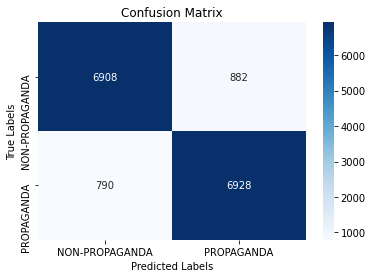

In [185]:
#Y_pred = model.predict_classes(X_test)
y_test = []
for test in Y_test:
  if test[0]==1:
    y_test.append(0)
  else:
    y_test.append(1)
  #print(test[0],"-",test[1])
  #break
y_test = np.array(y_test)
print('  Classification Report:\n',classification_report(y_test,y_pred),'\n')
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

ax.set_title('Confusion Matrix')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

ax.xaxis.set_ticklabels(['NON-PROPAGANDA', 'PROPAGANDA'])
ax.yaxis.set_ticklabels(['NON-PROPAGANDA', 'PROPAGANDA'])